**One-Way ANOVA:**

Used when you have `1 categorical variable with 3 or more groups` and `1 numerical dependent variable`.

___

**Two-Way ANOVA:**

Used when you have `2 categorical variables (each with 2 or more groups)` and `1 numerical dependent variable`.

### How to do One-way Anova? Step by Step

Category and Numerical

1. **Determine the number of groups** in the  category column.
   - If 2 groups: Use **t-test**.
   - If 3+ groups: Use **one-way ANOVA**.

2. **Check assumptions**: One-way ANOVA assumes normal distribution of data and equal variances across groups.

   - **Shapiro-Wilk test** for normality on each group.
   - **Levene's test** for equal variances.
   - If assumptions are violated:
     - Use **Kruskal-Wallis test** (non-parametric) for non-normal data.
     - Use **Welch’s ANOVA** for unequal variances.

4. **Perform ANOVA**:
   - Run one-way ANOVA if assumptions are met.
   - Interpret based on the **p-value**.
     
   - **Optional: Use critical value** approach if preferred, but p-value interpretation is simpler and more common**

5. **Post-hoc testing**:
   - If ANOVA shows significance, perform **Tukey's HSD** to determine which group means differ.


In [3]:
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import statsmodels.stats.multicomp as mc

In [4]:
# so you can get this dataset from searborn

In [5]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [6]:
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Q) Is there a statistically significant difference in the mean `sepal_width` among the three species of iris flowers (setosa, versicolor, and virginica) at a 0.05 significance level?

**From the .info() function, I learned that `species` is a categorical variable while `sepal_width` is a numerical variable. Therefore, I can either use an independent t-test or ANOVA. To determine which test to apply, I need to check the number of unique groups in the `species` column.**

In [11]:
df["species"].nunique()

3

In [12]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

**There are 3 groups, so ANOVA is appropriate. Before proceeding, I need to verify if the assumptions of ANOVA are met.**

**Shaprio Test - To check Normality**

In [15]:
stats.shapiro(df["sepal_width"])

ShapiroResult(statistic=0.9849168062210083, pvalue=0.10112646222114563)

**Levene's Test for Homogeneity of Variance**

In [17]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [18]:
#creating groups
group_1=df[df["species"]=="setosa"]["sepal_width"]
group_2=df[df["species"]=="versicolor"]["sepal_width"]
group_3=df[df["species"]=="virginica"]["sepal_width"]

In [19]:
stats.levene(group_1,group_2,group_3)

LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)

**Since both assumptions—normality and equal variances—are satisfied, we can confidently proceed with the ANOVA test to compare the mean 'sepal_width' values across the different species groups.**

### One_Way Anova Test

#### Hypothesis 

Ho: The mean 'sepal_width' is the same across all species groups.

H1: At least one species group has a different mean 'sepal_width'.


**Pvalue Method**

In [23]:
stats.f_oneway(group_1,group_2,group_3)

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)

**Since the p-value (4.49e-17) is much less than 0.05, we reject the null hypothesis. This means that at least one of the species groups has a significantly different mean 'sepal_width' compared to the others.**

**Critical Value Method (optional)**

In [26]:
q=0.05 #significance level

In [27]:
N= df.shape[0]
N

150

In [28]:
t=3 # no of groups
t

3

In [29]:
stats.f.isf(q=0.05, dfn=t-1, dfd=N-t)

3.057620651649394

**The calculated F-statistic (49.16) is far greater than the critical value (3.06). This places the F-statistic in the critical region, so we also reject the null hypothesis using the critical value method, further confirming that at least one group has a different mean.**

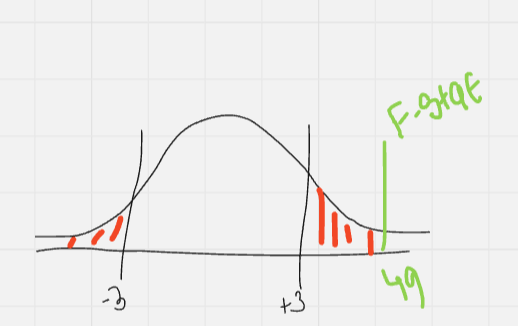

test_statistics = green

**The calculated F-statistic (49.16) is far greater than the critical value (3.06). This places the F-statistic in the critical region, so we also reject the null hypothesis using the critical value method, further confirming that at least one group has a different mean.**

After confirming that at least one species group has a different mean for `sepal_width`, we can use `Tukey's HSD (Honestly Significant Difference) test` to identify which specific groups differ.

In [32]:
import statsmodels.stats.multicomp as mc

In [33]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [34]:
comparison= mc.MultiComparison(data=df["sepal_width"], groups=df["species"])
comparison

In [35]:
tucky_hsd= comparison.tukeyhsd(alpha=0.05)
tucky_hsd

In [36]:
tucky_hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
setosa,versicolor,-0.658,0.0,-0.8189,-0.4971,True
setosa,virginica,-0.454,0.0,-0.6149,-0.2931,True
versicolor,virginica,0.204,0.0088,0.0431,0.3649,True
